In [12]:
%%bash
ls ../data/out/*

../data/out/minitwit310:
2024-02-21 14:13:00.csv.xz
2024-02-21 14:16:21.csv.xz
2024-02-21 14:19:40.csv.xz
2024-02-21 14:22:58.csv.xz
2024-02-21 14:26:13.csv.xz
2024-02-21 14:29:30.csv.xz
2024-02-21 14:32:46.csv.xz
2024-02-21 14:36:01.csv.xz
2024-02-21 14:39:18.csv.xz
2024-02-21 14:42:34.csv.xz
log.txt

../data/out/minitwit311:
2024-02-21 15:03:54.csv.xz
2024-02-21 15:07:01.csv.xz
2024-02-21 15:10:07.csv.xz
2024-02-21 15:13:15.csv.xz
2024-02-21 15:16:22.csv.xz
2024-02-21 15:19:29.csv.xz
2024-02-21 15:22:34.csv.xz
2024-02-21 15:25:40.csv.xz
2024-02-21 15:28:47.csv.xz
2024-02-21 15:31:53.csv.xz
log.txt

../data/out/minitwit312:
2024-02-21 15:42:40.csv.xz
2024-02-21 15:45:47.csv.xz
2024-02-21 15:48:50.csv.xz
2024-02-21 15:51:55.csv.xz
2024-02-21 15:54:59.csv.xz
2024-02-21 15:58:04.csv.xz
2024-02-21 16:01:08.csv.xz
2024-02-21 16:04:12.csv.xz
2024-02-21 16:07:17.csv.xz
2024-02-21 16:10:20.csv.xz
log.txt

../data/out/minitwit313:
2024-02-21 16:17:04.csv.xz
2024-02-21 16:20:15.csv.xz
2024-02-2

In [ ]:
import pandas as pd

pd.read_csv("../data/out/minitwit310/2024-02-21 14:13:00.csv.xz", compression="xz")

In [30]:
import pandas as pd
from pathlib import Path


# Get the measurement data sorted by Python version and time
p = Path("../data/out/")
python_versions_patterns = ["38", "39", "310", "311", "312", "313"]
meassurement_csv_files = []
for pv in python_versions_patterns:
    meassurement_csv_files += sorted(list(p.glob(f"minitwit{pv}/*.csv.xz")))

def read_all_meassurements(csv_paths):
    # Read MAIN_POWER column from all files, for the following analysis we do not need more  
    mp_cols = [pd.read_csv(f, usecols=["MAIN_POWER"], compression="xz") for f in csv_paths]
    col_names = [f.parent.name + " " + f.stem for f in csv_paths]
    df = pd.concat(mp_cols, ignore_index=True, axis=1)
    df.columns=col_names
    return df


df = read_all_meassurements(meassurement_csv_files)

In [68]:
df

,minitwit38 2024-02-21 13:36:08.csv,minitwit38 2024-02-21 13:39:29.csv,minitwit38 2024-02-21 13:42:47.csv,minitwit38 2024-02-21 13:46:05.csv,minitwit38 2024-02-21 13:49:23.csv,minitwit38 2024-02-21 13:52:40.csv,minitwit38 2024-02-21 13:55:58.csv,minitwit38 2024-02-21 13:59:15.csv,minitwit38 2024-02-21 14:02:33.csv,minitwit38 2024-02-21 14:05:50.csv,...,minitwit313 2024-02-21 16:17:04.csv,minitwit313 2024-02-21 16:20:15.csv,minitwit313 2024-02-21 16:23:23.csv,minitwit313 2024-02-21 16:26:30.csv,minitwit313 2024-02-21 16:29:38.csv,minitwit313 2024-02-21 16:32:46.csv,minitwit313 2024-02-21 16:35:57.csv,minitwit313 2024-02-21 16:39:05.csv,minitwit313 2024-02-21 16:42:15.csv,minitwit313 2024-02-21 16:45:24.csv
0,1.153497,1.152618,1.138629,1.150290,1.151621,1.152243,1.154469,1.150540,1.141487,1.138694,...,1.156663,1.153804,1.136357,1.166141,1.158651,1.155020,1.157401,1.154641,1.157238,1.166147
1,1.155002,1.160843,1.137827,1.160175,1.153771,1.148960,1.151941,1.151308,1.138189,1.222559,...,1.150270,1.147706,1.138981,1.153956,1.155632,1.150249,1.152235,1.152696,1.152924,1.175875
2,1.154055,1.157911,1.136537,1.166605,1.157077,1.153882,1.152038,1.167855,1.137693,1.159891,...,1.146524,1.152358,1.145996,1.149294,1.150352,1.148657,1.153451,1.161749,1.148415,1.170095
3,1.149711,1.152771,1.136211,1.157457,1.154157,1.206507,1.149698,1.164130,1.135838,1.141823,...,1.153589,1.162678,1.140045,1.157653,1.164292,1.161918,1.156626,1.155703,1.158373,1.170700
4,1.153337,1.153055,1.139233,1.154813,1.153292,1.164494,1.154531,1.164582,1.135332,1.141589,...,1.156113,1.152513,1.136914,1.156196,1.152535,1.160479,1.150684,1.154613,1.160353,1.165044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1434636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1434637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1434638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
SAMPLES_PER_SECOND = 10000

### A single power measurement

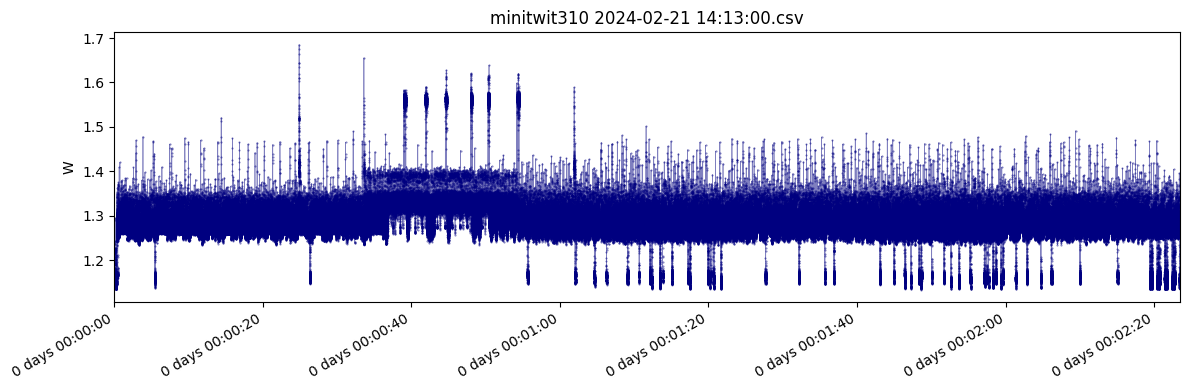

In [146]:
import matplotlib.pyplot as plt


fst_310_column = "minitwit310 2024-02-21 14:13:00.csv"
title = fst_310_column  #.replace("minitwit", "CPython ").replace(".csv", "")
single_measurement_df = df[fst_310_column].copy()
single_measurement_df.index = pd.TimedeltaIndex(pd.to_timedelta(single_measurement_df.index / SAMPLES_PER_SECOND, unit="s"))
ax = single_measurement_df.plot(lw=0.5, alpha=0.5, colormap='jet', marker='.', markersize=1, figsize=(12,4), title=title)
ax.autoscale(enable=True, axis="x", tight=True)
ax.set_ylabel("W")
plt.tight_layout()
plt.savefig("../images/single_run310.png", bbox_inches="tight")
plt.show()

In [131]:
single_measurement_df.describe()

count    1.434640e+06
mean     1.286211e+00
std      3.431576e-02
min      1.132974e+00
25%      1.273009e+00
50%      1.281954e+00
75%      1.295462e+00
max      1.685340e+00
Name: minitwit310 2024-02-21 14:13:00.csv, dtype: float64

In [132]:
single_measurement_df

0 days 00:00:00           1.171408
0 days 00:00:00.000100    1.158730
0 days 00:00:00.000200    1.153049
0 days 00:00:00.000300    1.150419
0 days 00:00:00.000400    1.153619
                            ...   
0 days 00:02:23.463500    1.162102
0 days 00:02:23.463600    1.166156
0 days 00:02:23.463700    1.162989
0 days 00:02:23.463800    1.162293
0 days 00:02:23.463900    1.160286
Name: minitwit310 2024-02-21 14:13:00.csv, Length: 1434640, dtype: float64

For each group (Python interpreter), I executed the scenario ten times.
To reduce the effect of other processes running on the computer at the same time, I compute the average over the ten measurements per group.
This is the data that is used as input for the next steps.

In [37]:
cpython38_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit38")]].mean(axis=1)
cpython39_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit39")]].mean(axis=1)
cpython310_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit310")]].mean(axis=1)
cpython311_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit311")]].mean(axis=1)
cpython312_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit312")]].mean(axis=1)
cpython313_scenario_mean = df[df.columns[df.columns.str.startswith("minitwit313")]].mean(axis=1)

In [38]:
cpython38_scenario_mean

0          1.148409
1          1.158058
2          1.154354
3          1.154830
4          1.151426
             ...   
1434635         NaN
1434636         NaN
1434637         NaN
1434638         NaN
1434639         NaN
Length: 1434640, dtype: float64

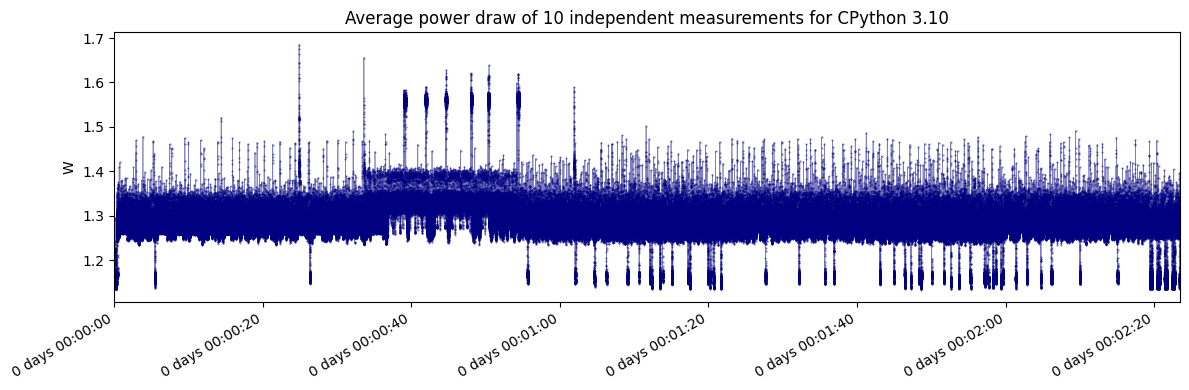

In [97]:
cpython310_plot_df = cpython310_scenario_mean.copy()
cpython310_plot_df.index = pd.TimedeltaIndex(pd.to_timedelta(cpython310_plot_df.index / SAMPLES_PER_SECOND, unit="s"))
ax = single_measurement_df.plot(lw=0.5, alpha=0.5, colormap='jet', marker='.', markersize=1, figsize=(12,4), 
                                title="Average power draw of 10 independent measurements for CPython 3.10")
ax.autoscale(enable=True, axis="x", tight=True)
ax.set_ylabel("W")
plt.tight_layout()
plt.savefig("../images/avg_run310.png", bbox_inches="tight")
plt.show()

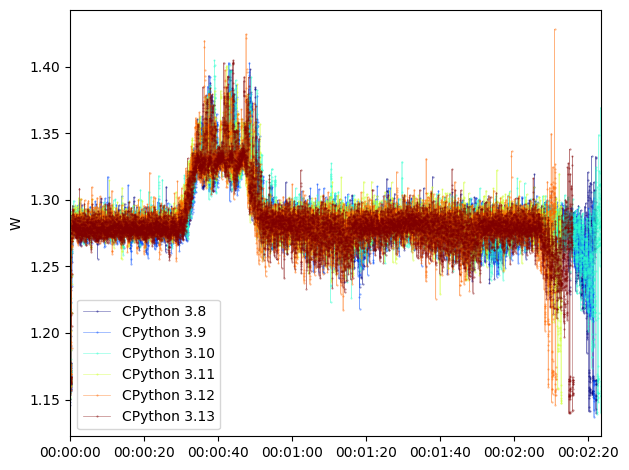

In [96]:
meassures_per_version = [cpython38_scenario_mean, cpython39_scenario_mean, cpython310_scenario_mean, cpython311_scenario_mean, cpython312_scenario_mean, cpython313_scenario_mean]
cols = [cpython_df[::100] for cpython_df in meassures_per_version]
avg_per_cpython_version_df = pd.concat(cols, ignore_index=True, axis=1)
avg_per_cpython_version_df.columns = ["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]
avg_per_cpython_version_df.index = pd.TimedeltaIndex(pd.to_timedelta(avg_per_cpython_version_df.index / SAMPLES_PER_SECOND, unit="s"))
ax = avg_per_cpython_version_df.plot(lw=0.5, alpha=0.5, colormap='jet', marker='.', markersize=1)
ax.autoscale(enable=True, axis="x", tight=True)
ax.set_ylabel("W")
plt.tight_layout()
plt.legend(loc="lower left")
plt.savefig("../images/avg_all_runs.png", bbox_inches="tight")
plt.show()

### Average power draw per scenario run

In [43]:
cpython38 = df[df.columns[df.columns.str.startswith("minitwit38")]].mean().reset_index(drop=True)
cpython39 = df[df.columns[df.columns.str.startswith("minitwit39")]].mean().reset_index(drop=True)
cpython310 = df[df.columns[df.columns.str.startswith("minitwit310")]].mean().reset_index(drop=True)
cpython311 = df[df.columns[df.columns.str.startswith("minitwit311")]].mean().reset_index(drop=True)
cpython312 = df[df.columns[df.columns.str.startswith("minitwit312")]].mean().reset_index(drop=True)
cpython313 = df[df.columns[df.columns.str.startswith("minitwit313")]].mean().reset_index(drop=True)

In [118]:
meassures_per_version = [cpython38, cpython39, cpython310, cpython311, cpython312, cpython313]
for m in meassures_per_version:
    print(m.describe())

count    10.000000
mean      1.286157
std       0.000563
min       1.285277
25%       1.285654
50%       1.286299
75%       1.286656
max       1.286823
dtype: float64
count    10.000000
mean      1.285947
std       0.000473
min       1.285103
25%       1.285733
50%       1.285897
75%       1.286342
max       1.286547
dtype: float64
count    10.000000
mean      1.286680
std       0.000794
min       1.285327
25%       1.286132
50%       1.286647
75%       1.287443
max       1.287598
dtype: float64
count    10.000000
mean      1.287683
std       0.000770
min       1.286579
25%       1.287268
50%       1.287694
75%       1.288286
max       1.288864
dtype: float64
count    10.000000
mean      1.286696
std       0.000601
min       1.285750
25%       1.286286
50%       1.286606
75%       1.287193
max       1.287598
dtype: float64
count    10.000000
mean      1.284268
std       0.000667
min       1.283466
25%       1.283782
50%       1.284120
75%       1.284786
max       1.285268
dtype: float6

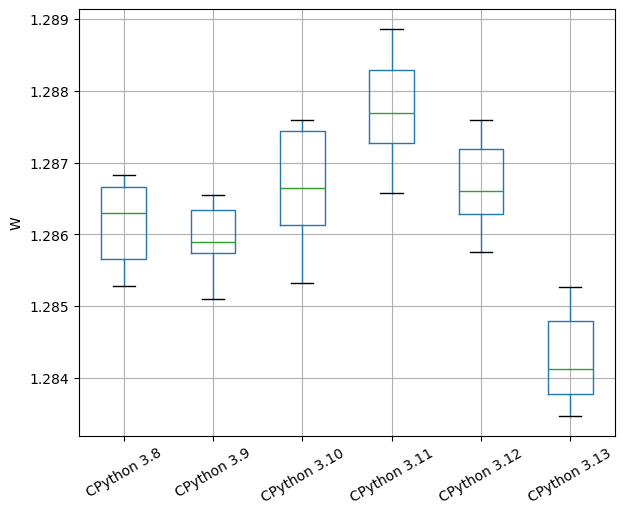

In [143]:
meassures_per_version = [cpython38, cpython39, cpython310, cpython311, cpython312, cpython313]
avg_per_run_df = pd.concat(meassures_per_version, ignore_index=True, axis=1)
avg_per_run_df.columns = ["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]
ax = avg_per_run_df.boxplot()
ax.autoscale(enable=True, axis="x", tight=True)
ax.set_ylabel("W")
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig("../images/power_per_scenario_boxplot.svg", bbox_inches="tight", format="svg")
plt.show()

In [139]:
(avg_per_run_df["CPython 3.10"].max() - avg_per_run_df["CPython 3.13"].min()) * 1000

4.131888238085635

In [140]:
python311_p_mean = avg_per_run_df["CPython 3.11"].mean()
python313_p_mean = avg_per_run_df["CPython 3.13"].mean()

drop_in_percent = (python311_p_mean - python313_p_mean) / (python311_p_mean / 100)
drop_in_percent

0.26520555022740316

In [142]:
python311_p_median = avg_per_run_df["CPython 3.11"].median()
python313_p_median = avg_per_run_df["CPython 3.13"].median()

drop_in_percent = (python311_p_median - python313_p_median) / (python311_p_median / 100)
drop_in_percent

0.27754720614597655

### Analysis of Runtimes

In [45]:
%%bash
grep "Scenario took" ../data/out/minitwit3*/*.txt

../data/out/minitwit310/log.txt:Scenario took 0:02:23.479039
../data/out/minitwit310/log.txt:Scenario took 0:02:20.144721
../data/out/minitwit310/log.txt:Scenario took 0:02:21.988503
../data/out/minitwit310/log.txt:Scenario took 0:02:20.434016
../data/out/minitwit310/log.txt:Scenario took 0:02:20.933668
../data/out/minitwit310/log.txt:Scenario took 0:02:20.099414
../data/out/minitwit310/log.txt:Scenario took 0:02:19.627156
../data/out/minitwit310/log.txt:Scenario took 0:02:21.711884
../data/out/minitwit310/log.txt:Scenario took 0:02:19.729667
../data/out/minitwit310/log.txt:Scenario took 0:02:21.293518
../data/out/minitwit311/log.txt:Scenario took 0:02:12.565672
../data/out/minitwit311/log.txt:Scenario took 0:02:11.234391
../data/out/minitwit311/log.txt:Scenario took 0:02:12.786707
../data/out/minitwit311/log.txt:Scenario took 0:02:12.520208
../data/out/minitwit311/log.txt:Scenario took 0:02:11.889569
../data/out/minitwit311/log.txt:Scenario took 0:02:11.247495
../data/out/minitwit311/

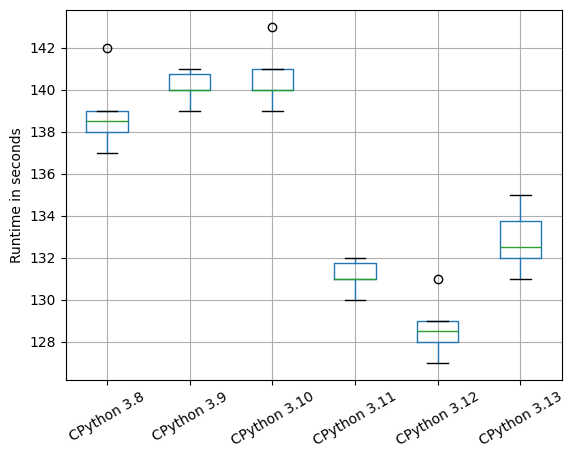

In [144]:
import numpy as np


cpython38_runtimes = pd.to_timedelta(["0:02:22.277075", "0:02:19.681751", "0:02:19.728392", "0:02:19.597655", "0:02:18.418359", "0:02:18.481506", "0:02:18.986309", "0:02:19.243725", "0:02:18.277154", "0:02:17.970005"])
cpython39_runtimes = pd.to_timedelta(["0:02:21.649128", "0:02:20.740743", "0:02:20.351865", "0:02:21.083002", "0:02:21.425196", "0:02:20.022695", "0:02:20.756683", "0:02:19.659603", "0:02:19.653629", "0:02:20.966123"])
cpython310_runtimes = pd.to_timedelta(["0:02:23.479039", "0:02:20.144721", "0:02:21.988503", "0:02:20.434016", "0:02:20.933668", "0:02:20.099414", "0:02:19.627156", "0:02:21.711884", "0:02:19.729667", "0:02:21.293518"])
cpython311_runtimes = pd.to_timedelta(["0:02:12.565672", "0:02:11.234391", "0:02:12.786707", "0:02:12.520208", "0:02:11.889569", "0:02:11.247495", "0:02:10.869137", "0:02:11.710533", "0:02:10.968105", "0:02:11.129485"])
cpython312_runtimes = pd.to_timedelta(["0:02:11.245171","0:02:08.517068","0:02:09.969824","0:02:08.353691","0:02:09.881350","0:02:08.666534","0:02:09.111224","0:02:09.356001","0:02:07.928220","0:02:07.838637"])
cpython313_runtimes = pd.to_timedelta(["0:02:15.891791","0:02:13.559537","0:02:12.193580","0:02:12.371750","0:02:12.987890","0:02:14.374103","0:02:11.995169","0:02:14.358228","0:02:13.639786","0:02:11.765220"])

runtimes = [cpython38_runtimes, cpython39_runtimes, cpython310_runtimes, cpython311_runtimes, cpython312_runtimes, cpython313_runtimes]
runtimes = [rt.seconds + rt.microseconds * 0.000001 for rt in runtimes]

runtimes_df = pd.DataFrame(runtimes).T
runtimes_df.columns = ["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]
runtimes_df[["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]].astype(np.int64).boxplot()
plt.ylabel("Runtime in seconds")
plt.xticks(rotation=30)
plt.savefig("../images/runtime_per_scenario_boxplot.svg", bbox_inches="tight", format="svg")
plt.show()

In [108]:
for v in runtimes_df.columns:
    print(runtimes_df[v].describe())

count     10.000000
mean     139.266193
std        1.230776
min      137.970005
25%      138.434146
50%      139.115017
75%      139.660727
max      142.277075
Name: CPython 3.8, dtype: float64
count     10.000000
mean     140.630867
std        0.695909
min      139.653629
25%      140.104987
50%      140.748713
75%      141.053782
max      141.649128
Name: CPython 3.9, dtype: float64
count     10.000000
mean     140.944159
std        1.204172
min      139.627156
25%      140.110741
50%      140.683842
75%      141.607292
max      143.479039
Name: CPython 3.10, dtype: float64
count     10.000000
mean     131.692130
std        0.715816
min      130.869137
25%      131.155711
50%      131.479014
75%      132.362548
max      132.786707
Name: CPython 3.11, dtype: float64
count     10.000000
mean     129.086772
std        1.058382
min      127.838637
25%      128.394535
50%      128.888879
75%      129.750013
max      131.245171
Name: CPython 3.12, dtype: float64
count     10.000000
mean   

In [110]:
runtimes_df["CPython 3.10"].max() - runtimes_df["CPython 3.12"].min()

15.640401999999995

In [115]:
python310_rt_mean = runtimes_df["CPython 3.10"].mean()
python311_rt_mean = runtimes_df["CPython 3.11"].mean()

drop_in_percent = (python310_rt_mean - python311_rt_mean) / (python310_rt_mean / 100)
drop_in_percent

6.564321992412109

In [116]:
python310_rt_mean = runtimes_df["CPython 3.10"].mean()
python312_rt_mean = runtimes_df["CPython 3.12"].mean()

drop_in_percent = (python310_rt_mean - python312_rt_mean) / (python310_rt_mean / 100)
drop_in_percent

8.412825843780649

### Analysis of Energy Consumption

E = P×τ

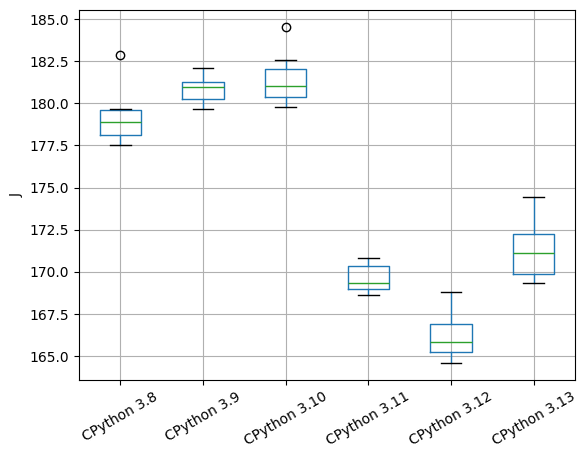

In [145]:
energy_consumption = []
for power, runtime in zip(meassures_per_version, runtimes):
    energy = power * runtime
    energy_consumption.append(energy)

energy_consumption_df = pd.DataFrame(energy_consumption).T
energy_consumption_df.columns = ["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]
energy_consumption_df[["CPython 3.8", "CPython 3.9", "CPython 3.10", "CPython 3.11", "CPython 3.12", "CPython 3.13"]].boxplot()
plt.ylabel("J")
plt.xticks(rotation=30)
plt.savefig("../images/energy_per_scenario_boxplot.svg", bbox_inches="tight", format="svg")
plt.show()

In [129]:
energy_consumption_df["CPython 3.13"].describe()

count     10.000000
mean     171.209779
std        1.602457
min      169.348066
25%      169.896268
50%      171.142099
75%      172.231509
max      174.424210
Name: CPython 3.13, dtype: float64

In [112]:
print(energy_consumption_df.describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & CPython 3.8 & CPython 3.9 & CPython 3.10 & CPython 3.11 & CPython 3.12 & CPython 3.13 \\
\midrule
count & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
mean & 179.117771 & 180.843603 & 181.349410 & 169.577235 & 166.095010 & 171.209779 \\
std & 1.523042 & 0.843076 & 1.469077 & 0.834749 & 1.296780 & 1.602457 \\
min & 177.511278 & 179.639470 & 179.772706 & 168.609047 & 164.604738 & 169.348066 \\
25% & 178.093423 & 180.230464 & 180.404463 & 168.964671 & 165.230967 & 169.896268 \\
50% & 178.898165 & 180.981945 & 181.032907 & 169.340348 & 165.838468 & 171.142099 \\
75% & 179.604974 & 181.293743 & 182.039182 & 170.367982 & 166.895678 & 172.231509 \\
max & 182.865403 & 182.127411 & 184.544316 & 170.840971 & 168.797714 & 174.424210 \\
\bottomrule
\end{tabular}



In [114]:
energy_consumption_df["CPython 3.8"].min() - energy_consumption_df["CPython 3.13"].max()

3.0870681656077466

In [65]:
python310_median = energy_consumption_df["CPython 3.10"].median()
python312_median = energy_consumption_df["CPython 3.12"].median()

drop_in_percent = (python310_median - python312_median) / (python310_median / 100)
drop_in_percent

8.393192053304135

In [93]:
python310_mean = energy_consumption_df["CPython 3.10"].mean()
python312_mean = energy_consumption_df["CPython 3.12"].mean()

drop_in_percent = (python310_mean - python312_mean) / (python310_mean / 100)
drop_in_percent

8.411607306843303

### Statistical Analysis

#### Are the energy consumptions drawn from a normal distribution?

<Axes: >

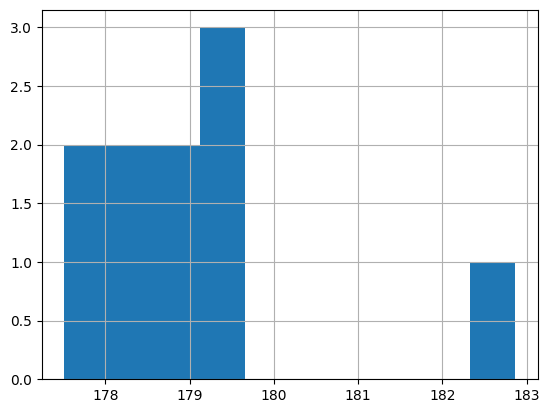

In [81]:
energy_consumption_df["CPython 3.8"].hist()

<Axes: >

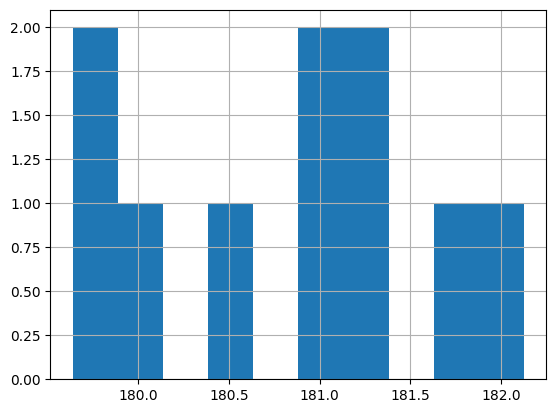

In [82]:
energy_consumption_df["CPython 3.9"].hist()

<Axes: >

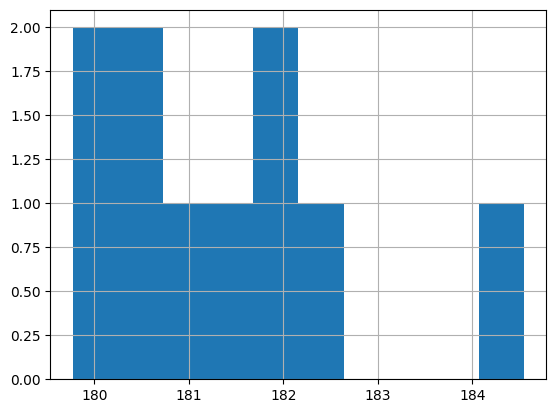

In [76]:
energy_consumption_df["CPython 3.10"].hist()

<Axes: >

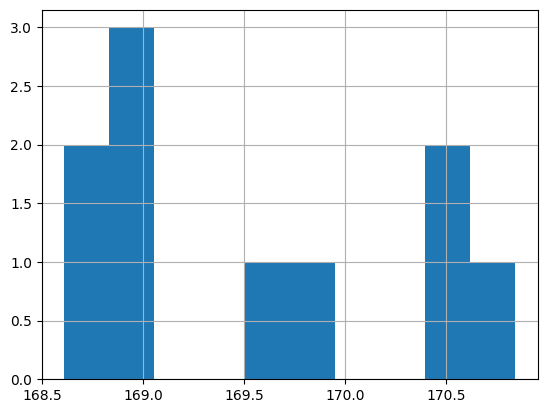

In [83]:
energy_consumption_df["CPython 3.11"].hist()

<Axes: >

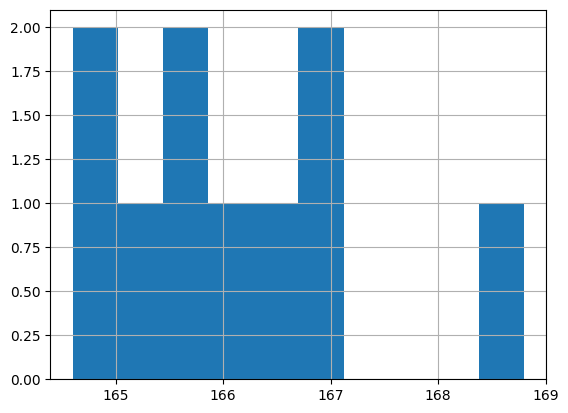

In [84]:
energy_consumption_df["CPython 3.12"].hist()

<Axes: >

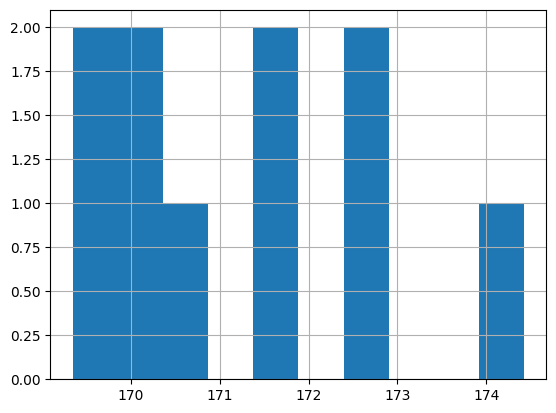

In [85]:
energy_consumption_df["CPython 3.13"].hist()

### Test for that samples come from a normally distributed population

This can be tested with multiple tests, e.g., [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), [Anderson-Darling Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html).

I apply both tests to the recorded energy measurements to cross-check.

In [80]:
from scipy.stats import shapiro, anderson
import warnings


warnings.filterwarnings("ignore")

for c in energy_consumption_df.columns:
    print(c)
    data = energy_consumption_df[c]
    res = shapiro(data)
    res = shapiro(data)
    print("  Shapiro results for complete data:", res)
    res = anderson(data, dist="norm")
    print("  Anderson results for complete data:", res)

CPython 3.8
  Shapiro results for complete data: ShapiroResult(statistic=0.8248115360454393, pvalue=0.028971695079870526)
  Anderson results for complete data: AndersonResult(statistic=0.672079918426892, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=179.1177705965697, scale=1.5230418547262206)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
CPython 3.9
  Shapiro results for complete data: ShapiroResult(statistic=0.949956680009038, pvalue=0.6679880384607835)
  Anderson results for complete data: AndersonResult(statistic=0.23036555625115973, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=180.84360274584645, scale=0.8430757866199524)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
CPython 3.10
  Shapiro r

#### Test for homoscedasticity

According to [this page](), I can test that via the Bartlett or via the Levene tests.
[This page](https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/) states that when the data is normally distributed, then the Bartlett test is preferred.
Consequently, I apply the Bartlett test to the energy measurement data.

In [90]:
from scipy.stats import bartlett


res = bartlett(energy_consumption_df["CPython 3.8"], 
               energy_consumption_df["CPython 3.9"], 
               energy_consumption_df["CPython 3.10"], 
               energy_consumption_df["CPython 3.11"], 
               energy_consumption_df["CPython 3.12"], 
               energy_consumption_df["CPython 3.13"])
res

BartlettResult(statistic=6.681657586731689, pvalue=0.24541253113615955)

In [113]:
from scipy.stats import levene


res = levene(energy_consumption_df["CPython 3.8"], 
             energy_consumption_df["CPython 3.9"], 
             energy_consumption_df["CPython 3.10"], 
             energy_consumption_df["CPython 3.11"], 
             energy_consumption_df["CPython 3.12"], 
             energy_consumption_df["CPython 3.13"])
res

LeveneResult(statistic=0.8795624223789661, pvalue=0.501113831047612)

### ANOVA Test

[Documentation for SciPy's ANOVA test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

* Null Hypothesis ($H_{0}$): There is no significant difference in energy consumption depending on the Python interpreter.
                             In other words, energy consumption of the server is more or less equal no matter which Python interpreter is installed on the server.
* Alternative Hypothesis ($H_{a}$): At least one of the group means differs significantly from at least one other group mean.
                                    That is, at least one version of a Python interpreter consumes considerably less or more energy than the others.


In [91]:
from scipy.stats import f_oneway


f_statistic, pvalue = f_oneway(energy_consumption_df["CPython 3.8"], 
                               energy_consumption_df["CPython 3.9"], 
                               energy_consumption_df["CPython 3.10"], 
                               energy_consumption_df["CPython 3.11"], 
                               energy_consumption_df["CPython 3.12"], 
                               energy_consumption_df["CPython 3.13"])

print(f_statistic)  # For reporting these are called f-statistics, see docs
print(pvalue)

253.31639717466925
3.472233714678495e-36


### Kruskal-Wallis Test

In case the sampled data would not come from a normally distributed population, one could perform a [Kruskal-Wallis Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) instead of an ANOVA test. However

In [92]:
from scipy.stats import kruskal


statistics, pvalues = kruskal(energy_consumption_df["CPython 3.8"], 
                              energy_consumption_df["CPython 3.9"], 
                              energy_consumption_df["CPython 3.10"], 
                              energy_consumption_df["CPython 3.11"], 
                              energy_consumption_df["CPython 3.12"], 
                              energy_consumption_df["CPython 3.13"])

print(statistics)  # For reporting these are Kruskal-Wallis H statistic, see docs
print(pvalues)

53.07475409836067
3.246560525443525e-10
